## SVD(Singular Value Decomposition) - 특이값 분해

* 대표적인 행렬 분해 방법
    * 고유값 분해(Eigen-Decomposition)
        * $ C = P \sum{}{} P^T $
        * $ C = 
     \begin{pmatrix}
      e_1 & \cdots & e_n \\
     \end{pmatrix}
     \begin{pmatrix}
      \lambda_1 & \cdots & 0 \\
      \vdots  & \ddots & \vdots  \\
      0 & \cdots & \lambda_n
     \end{pmatrix}
     \begin{pmatrix}
      e_1^t \\
      \vdots \\
      e_n^t \\
     \end{pmatrix}
    $
        * 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해
        * PCA는 분해된 고유 벡터에 원본 데이터를 투영하여 차원 축소<br><br>

    * 특이값 분해(Singular Value Decomposition)
        * $ A = U \sum{}{} V^T $
            1. U : 왼쪽 직교행렬
            2. $\sum{}{}$ : 대각 행렬
                * $\sum{}{}$는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0입니다.
                * $\sum{}{}$이 위치한 0이 아닌 값이 바로 행렬 A의 특이값입니다.
            3. $V^T$ : 오른쪽 직교행렬
        * 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이벡터는 서로 직교하는 성질을 가집니다.
            * $ U^TU = I $
            * $ V^TV = I $
        * SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 m * n 행렬도 분해 가능

### SVD 유형

* Full SVD
    * $A(m * n) = U(m * m) * \sum{}{} (m*n) * V'(n*n) $
* Compact SVD : 비대각 부분과 대각 원소가 0인 부분을 제거
    * $A(m * n) = U(m * p) * \sum{}{} (p*p) * V'(p*n)$
* **Truncated SVD** : 대각 원소 가운데 **상위 r개만** 추출하여 차원 축소
    * $A(m * n) = (m * r) * (r * r) * (r * n)$

### Truncated SVD 행렬 분해 의미

* $A(m * n) -> (m * r) * (r * r) * (r * n) = A'$ 
    * m * r = m과 Latent Factor의 관계 정도
    * r * r = Latent Factor의 크기
    * r * n = n의 Latent Factor 구성
    * A' = 잡음이 제거된 형태로 재구성
* SVD는 차원 축소를 위한 행렬 분해를 통해 Latent Factor(잠재요인)을 찾을 수 있는데, 이렇게 찾아진 Latent Factor는 많은 분야에 활용
    * 추전 엔진, 문재의 잠재 의미 분석 등
* SVD로 차원 축소 행렬 분해된 후, 다시 분해된 행렬을 이용하여 원복된 데이터 셋은 잡음(Noise)이 제거된 형태로 재구성될 수 있음
* 사이킷런에서는 Truncated SVD로 차원을 축소할 때, 원본 데이터에 $U \sum{}{}. $를 적용하여 차원 축소

### SVD 활용
* 이미지 압축/변환
* 추천 엔진
* 문서 잠재 의미 분석
* 의사 역행렬을 통한 모델 예측
    * 의사(pseudo)

---

In [5]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd
# numpy.linalg -> linear algebra

# 4*4 Random 행렬 a 생성
np.random.seed(121)

"""
np.random.randint : 균일 분포의 정수 난수 1개 생성
np.random.rand : 0부터 1사이의 균일 분포에서 난수 martix.array 생성
np.random.randn : 가우시안 정규 분포에서 난수 martix.array 생성
"""

a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


### SVD 행렬 분해

In [6]:
U, Sigma, Vt = svd(a) # Full SVD 반환 ..

print('U matrix :\n', np.round(U, 3))
print('Sigma Value :\n', np.round(Sigma, 3)) # 대각행렬인데, 사이값만 출력이 되서 나옴
print('V transpose matrix :\n', np.round(Vt, 3))

U matrix :
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value :
 [3.423 2.023 0.463 0.079]
V transpose matrix :
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


### 분해된 행렬들을 이용하여 다시 원행렬로 원복

In [7]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma) # np.diag : 대각행렬 생성(대각선의 사잇값들만 모여있는 1차원 배열을 2차원 대각행렬로 만들어줌)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


### 데이터 의존도가 높은 원본 데이터 행렬 생성

In [8]:
# Compact SVD

a[2] = a[0] + a[1]
a[3] = a[0]

print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [9]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value : \n', np.round(Sigma, 3))

# Sigma 값이 0이됨 (2행, 3행) -> 데이터 의존도가 높은 부분이 제외됨

(4, 4) (4,) (4, 4)
Sigma Value : 
 [2.663 0.807 0.    0.   ]


In [10]:
# 2열, 2행만 추출해오는 이유 -> Sigma 행렬이 4*4 대각행렬에서 2*2 대각행렬로 줄어들음

# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬(V의 transpose행렬)의 경우는 앞 2행만 추출
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)

print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD를 이용한 행렬 분해

In [13]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# Sicpy의 Truncated SVD는 희소행렬에만 지원을 해줌

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬 :\n', matrix)

U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원 :\n', U.shape, Sigma.shape, Vt.shape)
print('\n Sigma값 행렬 :\n', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
# 대각행렬의 대각값 중 상위 4개의 r값에 대해서만 차원 추출.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원 :', U_tr.shape, Sigma_tr.shape, Vt_tr.shape) # (6 * 4) (4 * 4) (4 * 6)
print('\nTruncated SVD Sigma값 행렬 :', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬 :\n', matrix_tr) # 행렬이 정확히 복원되지는 않음

원본 행렬 :
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원 :
 (6, 6) (6,) (6, 6)

 Sigma값 행렬 :
 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 : (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 : [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

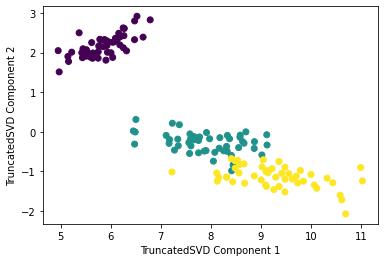

In [14]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

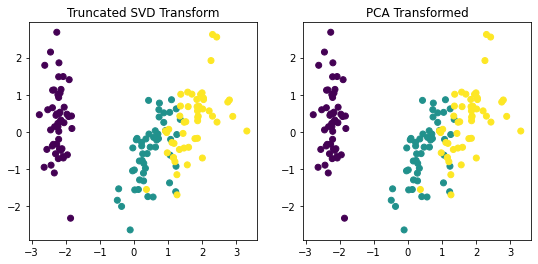

In [16]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transform')
ax2.set_title('PCA Transformed')

---

## NMF(Non Negative Matrix Factorization)

* NMP는 원본 행렬 내의 모든 원소 값이 모두 양수(0이상)라는 게 보장되면, 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭합니다.
    * $V(4 * 6) = W(4 * 2) * H(2 * 6)$

### 행렬 분해(Matrix Factorization)

* 행렬 분해(Matrix Factorization)은 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것입니다.
* 행렬 분해를 하게 되면 W행렬과 H행렬은 일반적으로 길고 가는 행렬 W(즉, 원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬)와 작고 넓은 행렬(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해됩니다. 이렇게 분해된 행렬은 Latent Factor(잠재 요소)를 특성으로 가지게 됩니다. 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬입니다.
    * $V(4 * 6) = W(4 * 2) * H(2 * 6)$
        * 여기서 2(가운데 숫자 값)가 Latent Factor ...

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

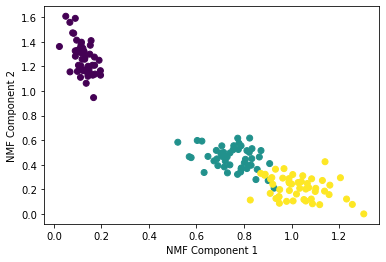

In [17]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)

nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')